In [1]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


# Importing Data

In [2]:
BBB_Train = pd.read_csv("BBB_LSTM_Input_Train.csv", index_col=0)
DDD_Train = pd.read_csv("DDD_LSTM_Input_Train.csv", index_col=0)
FFF_Train = pd.read_csv("FFF_LSTM_Input_Train.csv", index_col=0)

BBB_Test = pd.read_csv("BBB_LSTM_Input_Test.csv", index_col=0)
DDD_Test = pd.read_csv("DDD_LSTM_Input_Test.csv", index_col=0)
FFF_Test = pd.read_csv("FFF_LSTM_Input_Test.csv", index_col=0)

BBB_AUX_Train = pd.read_csv("BBB_LSTM_AUX_Train.csv", index_col=0)
DDD_AUX_Train = pd.read_csv("DDD_LSTM_AUX_Train.csv", index_col=0)
FFF_AUX_Train = pd.read_csv("FFF_LSTM_AUX_Train.csv", index_col=0)

BBB_AUX_Test = pd.read_csv("BBB_LSTM_AUX_Test.csv", index_col=0)
DDD_AUX_Test = pd.read_csv("DDD_LSTM_AUX_Test.csv", index_col=0)
FFF_AUX_Test = pd.read_csv("FFF_LSTM_AUX_Test.csv", index_col=0)

# Transforming Data

#### Normalize variables for every course  per semester

In [3]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,2.181818,0,0.000000,Pass
2,1008675,2013B,1,12.391304,1,70.000000,Pass
4,1008675,2013B,2,12.875000,1,65.000000,Pass
5,1008675,2013B,3,7.250000,1,56.666667,Pass
6,1008675,2013B,4,5.166667,1,55.250000,Pass


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
Semesters_Train = BBB_Train.code_presentation.unique()
dfs_Train = list([BBB_Train, DDD_Train, FFF_Train])
Semesters_Test = BBB_Test.code_presentation.unique()
dfs_Test = list([BBB_Test, DDD_Test, FFF_Test])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        scaler.fit(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])


for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        scaler.fit(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])

In [7]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,0.019416,0.000000,0.000000,Pass
2,1008675,2013B,1,0.110267,0.142857,0.700000,Pass
4,1008675,2013B,2,0.114572,0.142857,0.650000,Pass
5,1008675,2013B,3,0.064516,0.142857,0.566667,Pass
6,1008675,2013B,4,0.045977,0.142857,0.552500,Pass


#### Take subset of the student background data to use as auxiliary input for the LSTM models

In [8]:
BBB_AUX_Train.head()

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,gender_F,gender_M,highest_education_Lower Than A Level,highest_education_A Level or Equivalent,highest_education_HE Qualification,...,imd_band_80-90%,age_band_35-55,age_band_0-35,age_band_55<=,disability_N,disability_Y,year_2013,year_2014,semester_B,semester_J
2346,BBB,2013B,1008675,0.0,0.000000,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
794,BBB,2013B,104054,0.0,0.222222,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
795,BBB,2013B,108377,0.0,0.222222,1,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
796,BBB,2013B,108589,0.0,0.000000,1,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
2347,BBB,2013B,1098728,0.0,0.222222,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [9]:
BBB_AUX_Train = BBB_AUX_Train.iloc[:,3:33]
DDD_AUX_Train = DDD_AUX_Train.iloc[:,3:33]
FFF_AUX_Train = FFF_AUX_Train.iloc[:,3:33]

BBB_AUX_Test = BBB_AUX_Test.iloc[:,3:33]
DDD_AUX_Test = DDD_AUX_Test.iloc[:,3:33]
FFF_AUX_Test = FFF_AUX_Test.iloc[:,3:33]

In [10]:
print(BBB_AUX_Train.shape)
print(DDD_AUX_Train.shape)
print(FFF_AUX_Train.shape)

print(BBB_AUX_Test.shape)
print(DDD_AUX_Test.shape)
print(FFF_AUX_Test.shape)

(3978, 29)
(2866, 29)
(3849, 29)
(1543, 29)
(1156, 29)
(1510, 29)


#### Make a 1D array of target labels (pass / fail)

In [11]:
BBB_Train_Targets = BBB_Train["final_result"][0::11]
DDD_Train_Targets = DDD_Train["final_result"][0::11]
FFF_Train_Targets = FFF_Train["final_result"][0::11]

BBB_Test_Targets = BBB_Test["final_result"][0::11]
DDD_Test_Targets = DDD_Test["final_result"][0::11]
FFF_Test_Targets = FFF_Test["final_result"][0::11]

In [12]:
FFF_Train_Targets.head(n=20)

104974           Fail
104985           Pass
104996           Fail
105007    Distinction
105018           Pass
105029           Pass
105040           Fail
105051           Pass
105062           Fail
105073           Pass
105084           Pass
105095           Pass
105106           Pass
105117           Pass
105128           Pass
105139           Pass
105150           Pass
105161           Fail
105172           Fail
105183           Pass
Name: final_result, dtype: object

In [13]:
BBB_Train_Targets_1D = np.array(BBB_Train_Targets)
DDD_Train_Targets_1D = np.array(DDD_Train_Targets)
FFF_Train_Targets_1D = np.array(FFF_Train_Targets)

BBB_Test_Targets_1D = np.array(BBB_Test_Targets)
DDD_Test_Targets_1D = np.array(DDD_Test_Targets)
FFF_Test_Targets_1D = np.array(FFF_Test_Targets)


#### Make binary target labels in which "distinction" is considered "pass"

In [14]:
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Fail"] = 0
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Pass"] = 1
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Distinction"] = 1

DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Fail"] = 0
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Pass"] = 1
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Distinction"] = 1

FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Fail"] = 0
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Pass"] = 1
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Distinction"] = 1

BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Fail"] = 0
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Pass"] = 1
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Distinction"] = 1

DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Fail"] = 0
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Pass"] = 1
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Distinction"] = 1

FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Fail"] = 0
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Pass"] = 1
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Distinction"] = 1

In [15]:
BBB_Train_Targets_1D = BBB_Train_Targets_1D.astype('int64')
DDD_Train_Targets_1D = DDD_Train_Targets_1D.astype('int64')
FFF_Train_Targets_1D = FFF_Train_Targets_1D.astype('int64')

BBB_Test_Targets_1D = BBB_Test_Targets_1D.astype('int64')
DDD_Test_Targets_1D = DDD_Test_Targets_1D.astype('int64')
FFF_Test_Targets_1D = FFF_Test_Targets_1D.astype('int64')

In [16]:
print(FFF_Train_Targets_1D.shape)

(3849,)


In [17]:
FFF_Train_Targets_1D

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

#### Keep only the relevant variables to use as input for the LSTM model (cut out course, semester, id and decile)

In [18]:
BBB_Train_df = BBB_Train.iloc[:,3:6]
DDD_Train_df = DDD_Train.iloc[:,3:6]
FFF_Train_df = FFF_Train.iloc[:,3:6]

BBB_Test_df = BBB_Test.iloc[:,3:6]
DDD_Test_df = DDD_Test.iloc[:,3:6]
FFF_Test_df = FFF_Test.iloc[:,3:6]

In [19]:
FFF_Train_df.head(n=20)

,Avg_Clicks,Asgmts,Avg_Asgmt_Score
104974,0.010130,0.000,0.000000
104975,0.109139,0.125,0.700000
104977,0.003323,0.000,0.700000
104978,0.003323,0.000,0.700000
104979,0.032648,0.000,0.700000
104980,0.005669,0.125,0.490000
104981,0.000000,0.000,0.490000
104982,0.000000,0.000,0.490000
104983,0.000000,0.000,0.490000
104984,0.000000,0.000,0.490000


#### Number of students in the courses across all 4 semesters

In [20]:
print("BBB Train\n")
print(BBB_Train_df.count()/11,"\n")

print("DDD Train\n")
print(DDD_Train_df.count()/11,"\n")

print("FFF Train\n")
print(FFF_Train_df.count()/11,"\n")

print("BBB Test\n")
print(BBB_Test_df.count()/11,"\n")

print("DDD Test\n")
print(DDD_Test_df.count()/11,"\n")

print("FFF Test\n")
print(FFF_Test_df.count()/11,"\n")

BBB Train

Avg_Clicks         3978.0
Asgmts             3978.0
Avg_Asgmt_Score    3978.0
dtype: float64 

DDD Train

Avg_Clicks         2866.0
Asgmts             2866.0
Avg_Asgmt_Score    2866.0
dtype: float64 

FFF Train

Avg_Clicks         3849.0
Asgmts             3849.0
Avg_Asgmt_Score    3849.0
dtype: float64 

BBB Test

Avg_Clicks         1543.0
Asgmts             1543.0
Avg_Asgmt_Score    1543.0
dtype: float64 

DDD Test

Avg_Clicks         1156.0
Asgmts             1156.0
Avg_Asgmt_Score    1156.0
dtype: float64 

FFF Test

Avg_Clicks         1510.0
Asgmts             1510.0
Avg_Asgmt_Score    1510.0
dtype: float64 



#### Convert dataframes into 2D arrays

In [21]:
BBB_Train_2D = BBB_Train_df.values
DDD_Train_2D = DDD_Train_df.values
FFF_Train_2D = FFF_Train_df.values

BBB_Test_2D = BBB_Test_df.values
DDD_Test_2D = DDD_Test_df.values
FFF_Test_2D = FFF_Test_df.values

#### Reshape 2D arrays to 3D arrays necessary for LSTM
Format : samples (students), timesteps (deciles), features (clicks & assignments)

In [22]:
BBB_Train_3D = BBB_Train_2D.reshape(int(BBB_Train_df["Avg_Clicks"].count()/11),11,len(BBB_Train_df.columns))
DDD_Train_3D = DDD_Train_2D.reshape(int(DDD_Train_df["Avg_Clicks"].count()/11),11,len(DDD_Train_df.columns))
FFF_Train_3D = FFF_Train_2D.reshape(int(FFF_Train_df["Avg_Clicks"].count()/11),11,len(FFF_Train_df.columns))

BBB_Test_3D = BBB_Test_2D.reshape(int(BBB_Test_df["Avg_Clicks"].count()/11),11,len(BBB_Test_df.columns))
DDD_Test_3D = DDD_Test_2D.reshape(int(DDD_Test_df["Avg_Clicks"].count()/11),11,len(DDD_Test_df.columns))
FFF_Test_3D = FFF_Test_2D.reshape(int(FFF_Test_df["Avg_Clicks"].count()/11),11,len(FFF_Test_df.columns))


In [23]:
print(FFF_Train_3D.shape)

(3849, 11, 3)


#### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [24]:
BBB_Train_3D_Decile9 = np.delete(BBB_Train_3D,-1,axis=1)
BBB_Train_3D_Decile8 = np.delete(BBB_Train_3D,np.s_[-2:],axis=1)
BBB_Train_3D_Decile7 = np.delete(BBB_Train_3D,np.s_[-3:],axis=1)
BBB_Train_3D_Decile6 = np.delete(BBB_Train_3D,np.s_[-4:],axis=1)
BBB_Train_3D_Decile5 = np.delete(BBB_Train_3D,np.s_[-5:],axis=1)
BBB_Train_3D_Decile4 = np.delete(BBB_Train_3D,np.s_[-6:],axis=1)
BBB_Train_3D_Decile3 = np.delete(BBB_Train_3D,np.s_[-7:],axis=1)
BBB_Train_3D_Decile2 = np.delete(BBB_Train_3D,np.s_[-8:],axis=1)
BBB_Train_3D_Decile1 = np.delete(BBB_Train_3D,np.s_[-9:],axis=1)
BBB_Train_3D_Decile0 = np.delete(BBB_Train_3D,np.s_[-10:],axis=1)

BBB_Test_3D_Decile9 = np.delete(BBB_Test_3D,-1,axis=1)
BBB_Test_3D_Decile8 = np.delete(BBB_Test_3D,np.s_[-2:],axis=1)
BBB_Test_3D_Decile7 = np.delete(BBB_Test_3D,np.s_[-3:],axis=1)
BBB_Test_3D_Decile6 = np.delete(BBB_Test_3D,np.s_[-4:],axis=1)
BBB_Test_3D_Decile5 = np.delete(BBB_Test_3D,np.s_[-5:],axis=1)
BBB_Test_3D_Decile4 = np.delete(BBB_Test_3D,np.s_[-6:],axis=1)
BBB_Test_3D_Decile3 = np.delete(BBB_Test_3D,np.s_[-7:],axis=1)
BBB_Test_3D_Decile2 = np.delete(BBB_Test_3D,np.s_[-8:],axis=1)
BBB_Test_3D_Decile1 = np.delete(BBB_Test_3D,np.s_[-9:],axis=1)
BBB_Test_3D_Decile0 = np.delete(BBB_Test_3D,np.s_[-10:],axis=1)

In [25]:
DDD_Train_3D_Decile9 = np.delete(DDD_Train_3D,-1,axis=1)
DDD_Train_3D_Decile8 = np.delete(DDD_Train_3D,np.s_[-2:],axis=1)
DDD_Train_3D_Decile7 = np.delete(DDD_Train_3D,np.s_[-3:],axis=1)
DDD_Train_3D_Decile6 = np.delete(DDD_Train_3D,np.s_[-4:],axis=1)
DDD_Train_3D_Decile5 = np.delete(DDD_Train_3D,np.s_[-5:],axis=1)
DDD_Train_3D_Decile4 = np.delete(DDD_Train_3D,np.s_[-6:],axis=1)
DDD_Train_3D_Decile3 = np.delete(DDD_Train_3D,np.s_[-7:],axis=1)
DDD_Train_3D_Decile2 = np.delete(DDD_Train_3D,np.s_[-8:],axis=1)
DDD_Train_3D_Decile1 = np.delete(DDD_Train_3D,np.s_[-9:],axis=1)
DDD_Train_3D_Decile0 = np.delete(DDD_Train_3D,np.s_[-10:],axis=1)

DDD_Test_3D_Decile9 = np.delete(DDD_Test_3D,-1,axis=1)
DDD_Test_3D_Decile8 = np.delete(DDD_Test_3D,np.s_[-2:],axis=1)
DDD_Test_3D_Decile7 = np.delete(DDD_Test_3D,np.s_[-3:],axis=1)
DDD_Test_3D_Decile6 = np.delete(DDD_Test_3D,np.s_[-4:],axis=1)
DDD_Test_3D_Decile5 = np.delete(DDD_Test_3D,np.s_[-5:],axis=1)
DDD_Test_3D_Decile4 = np.delete(DDD_Test_3D,np.s_[-6:],axis=1)
DDD_Test_3D_Decile3 = np.delete(DDD_Test_3D,np.s_[-7:],axis=1)
DDD_Test_3D_Decile2 = np.delete(DDD_Test_3D,np.s_[-8:],axis=1)
DDD_Test_3D_Decile1 = np.delete(DDD_Test_3D,np.s_[-9:],axis=1)
DDD_Test_3D_Decile0 = np.delete(DDD_Test_3D,np.s_[-10:],axis=1)

In [26]:
FFF_Train_3D_Decile9 = np.delete(FFF_Train_3D,-1,axis=1)
FFF_Train_3D_Decile8 = np.delete(FFF_Train_3D,np.s_[-2:],axis=1)
FFF_Train_3D_Decile7 = np.delete(FFF_Train_3D,np.s_[-3:],axis=1)
FFF_Train_3D_Decile6 = np.delete(FFF_Train_3D,np.s_[-4:],axis=1)
FFF_Train_3D_Decile5 = np.delete(FFF_Train_3D,np.s_[-5:],axis=1)
FFF_Train_3D_Decile4 = np.delete(FFF_Train_3D,np.s_[-6:],axis=1)
FFF_Train_3D_Decile3 = np.delete(FFF_Train_3D,np.s_[-7:],axis=1)
FFF_Train_3D_Decile2 = np.delete(FFF_Train_3D,np.s_[-8:],axis=1)
FFF_Train_3D_Decile1 = np.delete(FFF_Train_3D,np.s_[-9:],axis=1)
FFF_Train_3D_Decile0 = np.delete(FFF_Train_3D,np.s_[-10:],axis=1)

FFF_Test_3D_Decile9 = np.delete(FFF_Test_3D,-1,axis=1)
FFF_Test_3D_Decile8 = np.delete(FFF_Test_3D,np.s_[-2:],axis=1)
FFF_Test_3D_Decile7 = np.delete(FFF_Test_3D,np.s_[-3:],axis=1)
FFF_Test_3D_Decile6 = np.delete(FFF_Test_3D,np.s_[-4:],axis=1)
FFF_Test_3D_Decile5 = np.delete(FFF_Test_3D,np.s_[-5:],axis=1)
FFF_Test_3D_Decile4 = np.delete(FFF_Test_3D,np.s_[-6:],axis=1)
FFF_Test_3D_Decile3 = np.delete(FFF_Test_3D,np.s_[-7:],axis=1)
FFF_Test_3D_Decile2 = np.delete(FFF_Test_3D,np.s_[-8:],axis=1)
FFF_Test_3D_Decile1 = np.delete(FFF_Test_3D,np.s_[-9:],axis=1)
FFF_Test_3D_Decile0 = np.delete(FFF_Test_3D,np.s_[-10:],axis=1)

# LSTM

In [27]:
from sklearn.metrics import classification_report
from keras import Sequential
from keras.layers import Input,Embedding, LSTM, Dense
from keras.models import Model
from keras.optimizers import SGD
from matplotlib import pyplot
np.random.seed(7)
%matplotlib inline  
#np.set_printoptions(threshold=np.nan)

## LSTM Course BBB

In [28]:
Deciles = np.arange(11)
BBB_model_names = ["modelBBB0", "modelBBB1", "modelBBB2", "modelBBB3", "modelBBB4", "modelBBB5",
                   "modelBBB6", "modelBBB7", "modelBBB8", "modelBBB9", "modelBBB10"]
BBB_names = ["BBB0", "BBB1", "BBB2", "BBB3", "BBB4", "BBB5", "BBB6", "BBB7", "BBB8", "BBB9", "BBB10"]
BBB_Train_set = [BBB_Train_3D_Decile0,BBB_Train_3D_Decile1,BBB_Train_3D_Decile2,BBB_Train_3D_Decile3,BBB_Train_3D_Decile4,
                 BBB_Train_3D_Decile5,BBB_Train_3D_Decile6,BBB_Train_3D_Decile7,BBB_Train_3D_Decile8,BBB_Train_3D_Decile9,
                 BBB_Train_3D]
BBB_Test_set = [BBB_Test_3D_Decile0,BBB_Test_3D_Decile1,BBB_Test_3D_Decile2,BBB_Test_3D_Decile3,BBB_Test_3D_Decile4,
                 BBB_Test_3D_Decile5,BBB_Test_3D_Decile6,BBB_Test_3D_Decile7,BBB_Test_3D_Decile8,BBB_Test_3D_Decile9,
                 BBB_Test_3D]


Fit LSTM Course BBB - 2 Target Classes - Decile0
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 11s 3ms/step - loss: 0.6431 - acc: 0.6576 - val_loss: 0.5689 - val_acc: 0.7466
Epoch 2/4000
3978/3978 [==============================] - 8s 2ms/step - loss: 0.6386 - acc: 0.6667 - val_loss: 0.6331 - val_acc: 0.6948
Epoch 3/4000
3978/3978 [==============================] - 8s 2ms/step - loss: 0.6418 - acc: 0.6755 - val_loss: 0.5705 - val_acc: 0.7395


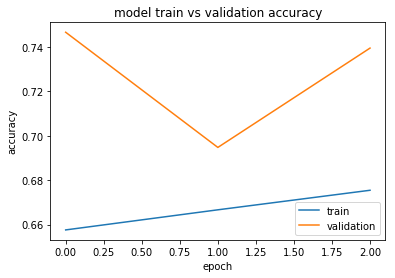

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.38      0.05      0.08       391
          1       0.75      0.97      0.85      1152

avg / total       0.66      0.74      0.65      1543

Fit LSTM Course BBB - 2 Target Classes - Decile1
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 11s 3ms/step - loss: 0.5915 - acc: 0.7187 - val_loss: 0.8545 - val_acc: 0.6591
Epoch 2/4000
3978/3978 [==============================] - 8s 2ms/step - loss: 0.5892 - acc: 0.7469 - val_loss: 1.8711 - val_acc: 0.5813
Epoch 3/4000
3978/3978 [==============================] - 9s 2ms/step - loss: 0.6049 - acc: 0.7471 - val_loss: 0.7118 - val_acc: 0.7019


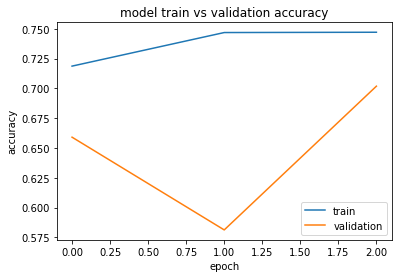

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.40      0.34      0.36       391
          1       0.79      0.83      0.81      1152

avg / total       0.69      0.70      0.69      1543

Fit LSTM Course BBB - 2 Target Classes - Decile2
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 12s 3ms/step - loss: 0.5696 - acc: 0.7343 - val_loss: 1.3446 - val_acc: 0.6487
Epoch 2/4000
3978/3978 [==============================] - 9s 2ms/step - loss: 0.5456 - acc: 0.7702 - val_loss: 1.5682 - val_acc: 0.6643
Epoch 3/4000
3978/3978 [==============================] - 9s 2ms/step - loss: 0.5609 - acc: 0.7627 - val_loss: 1.1879 - val_acc: 0.6714


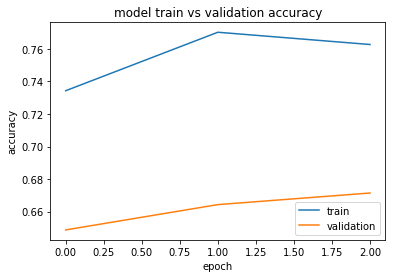

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.37      0.44      0.41       391
          1       0.80      0.75      0.77      1152

avg / total       0.69      0.67      0.68      1543

Fit LSTM Course BBB - 2 Target Classes - Decile3
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 13s 3ms/step - loss: 0.5619 - acc: 0.7371 - val_loss: 0.9175 - val_acc: 0.6092
Epoch 2/4000
3978/3978 [==============================] - 10s 3ms/step - loss: 0.5457 - acc: 0.7755 - val_loss: 0.5524 - val_acc: 0.7868
Epoch 3/4000
3978/3978 [==============================] - 10s 3ms/step - loss: 0.5607 - acc: 0.7743 - val_loss: 0.7114 - val_acc: 0.7622


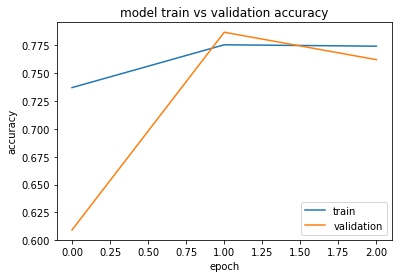

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.37      0.44       391
          1       0.81      0.89      0.85      1152

avg / total       0.74      0.76      0.75      1543

Fit LSTM Course BBB - 2 Target Classes - Decile4
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 14s 3ms/step - loss: 0.5345 - acc: 0.7559 - val_loss: 1.0188 - val_acc: 0.6073
Epoch 2/4000
3978/3978 [==============================] - 11s 3ms/step - loss: 0.4969 - acc: 0.7989 - val_loss: 1.7549 - val_acc: 0.6053
Epoch 3/4000
3978/3978 [==============================] - 11s 3ms/step - loss: 0.5136 - acc: 0.8017 - val_loss: 0.8800 - val_acc: 0.6312


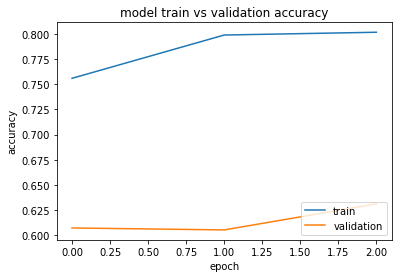

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.36      0.60      0.45       391
          1       0.82      0.64      0.72      1152

avg / total       0.71      0.63      0.65      1543

Fit LSTM Course BBB - 2 Target Classes - Decile5
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 15s 4ms/step - loss: 0.5234 - acc: 0.7567 - val_loss: 0.5506 - val_acc: 0.7913
Epoch 2/4000
3978/3978 [==============================] - 12s 3ms/step - loss: 0.4797 - acc: 0.8044 - val_loss: 0.5990 - val_acc: 0.8172
Epoch 3/4000
3978/3978 [==============================] - 12s 3ms/step - loss: 0.5174 - acc: 0.8052 - val_loss: 1.0684 - val_acc: 0.8114


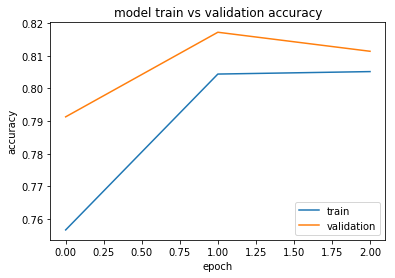

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.26      0.41       391
          1       0.80      1.00      0.89      1152

avg / total       0.85      0.81      0.77      1543

Fit LSTM Course BBB - 2 Target Classes - Decile6
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 16s 4ms/step - loss: 0.4839 - acc: 0.7893 - val_loss: 0.7771 - val_acc: 0.8224
Epoch 2/4000
3978/3978 [==============================] - 13s 3ms/step - loss: 0.4409 - acc: 0.8386 - val_loss: 0.6770 - val_acc: 0.8179
Epoch 3/4000
3978/3978 [==============================] - 13s 3ms/step - loss: 0.4761 - acc: 0.8389 - val_loss: 0.4782 - val_acc: 0.8496


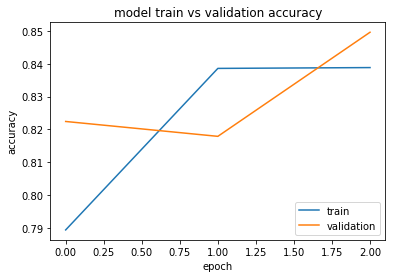

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.49      0.62       391
          1       0.85      0.97      0.91      1152

avg / total       0.85      0.85      0.83      1543

Fit LSTM Course BBB - 2 Target Classes - Decile7
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 17s 4ms/step - loss: 0.4422 - acc: 0.8125 - val_loss: 0.4540 - val_acc: 0.8445
Epoch 2/4000
3978/3978 [==============================] - 14s 4ms/step - loss: 0.4202 - acc: 0.8655 - val_loss: 0.4730 - val_acc: 0.8769
Epoch 3/4000
3978/3978 [==============================] - 14s 4ms/step - loss: 0.4361 - acc: 0.8632 - val_loss: 0.4264 - val_acc: 0.8723


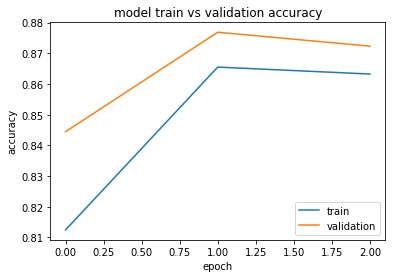

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.51      0.67       391
          1       0.86      0.99      0.92      1152

avg / total       0.89      0.87      0.86      1543

Fit LSTM Course BBB - 2 Target Classes - Decile8
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 18s 4ms/step - loss: 0.4239 - acc: 0.8283 - val_loss: 0.5876 - val_acc: 0.8373
Epoch 2/4000
3978/3978 [==============================] - 15s 4ms/step - loss: 0.4066 - acc: 0.8731 - val_loss: 0.3478 - val_acc: 0.8840
Epoch 3/4000
3978/3978 [==============================] - 15s 4ms/step - loss: 0.4506 - acc: 0.8718 - val_loss: 0.4679 - val_acc: 0.8846


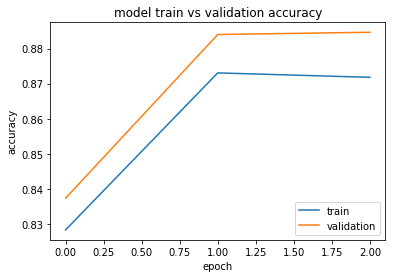

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.55      0.71       391
          1       0.87      1.00      0.93      1152

avg / total       0.90      0.88      0.87      1543

Fit LSTM Course BBB - 2 Target Classes - Decile9
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 19s 5ms/step - loss: 0.4129 - acc: 0.8333 - val_loss: 0.4267 - val_acc: 0.9054
Epoch 2/4000
3978/3978 [==============================] - 16s 4ms/step - loss: 0.3821 - acc: 0.8811 - val_loss: 0.2755 - val_acc: 0.9034
Epoch 3/4000
3978/3978 [==============================] - 16s 4ms/step - loss: 0.4168 - acc: 0.8816 - val_loss: 0.4871 - val_acc: 0.9145


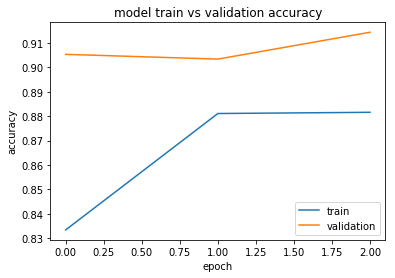

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.68      0.80       391
          1       0.90      0.99      0.95      1152

avg / total       0.92      0.91      0.91      1543

Fit LSTM Course BBB - 2 Target Classes - Decile10
Train on 3978 samples, validate on 1543 samples
Epoch 1/4000
3978/3978 [==============================] - 20s 5ms/step - loss: 0.4298 - acc: 0.8323 - val_loss: 0.5778 - val_acc: 0.8548
Epoch 2/4000
3978/3978 [==============================] - 17s 4ms/step - loss: 0.3875 - acc: 0.8768 - val_loss: 0.8589 - val_acc: 0.8458
Epoch 3/4000
3978/3978 [==============================] - 17s 4ms/step - loss: 0.4028 - acc: 0.8816 - val_loss: 0.3164 - val_acc: 0.8950


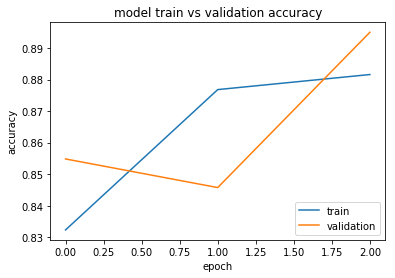

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.59      0.74       391
          1       0.88      1.00      0.93      1152

avg / total       0.91      0.90      0.88      1543



In [31]:
for i in Deciles:

    # Build model for each timestep
    
    LSTM_input = Input(shape=(i+1,3), name='LSTM_input')
    LSTM_out = LSTM(32)(LSTM_input)

    auxiliary_input = Input(shape=(29,), name='aux_input')
    auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
    auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

    x = keras.layers.concatenate([LSTM_out, auxiliary_output])


    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    main_output = Dense(1, activation='sigmoid', name='main_output')(x)

    BBB_model_names[i] = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
    BBB_model_names[i].compile(optimizer="rmsprop", loss='binary_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
    ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course BBB - 2 Target Classes - Decile' + str(i))
    
    history = BBB_model_names[i].fit([BBB_Train_set[i],BBB_AUX_Train], BBB_Train_Targets_1D, epochs=4000, batch_size=1, verbose=1,
                                    validation_data = ([BBB_Test_set[i], BBB_AUX_Test], BBB_Test_Targets_1D), callbacks = [ES])
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    y_pred_BBB = BBB_model_names[i].predict([BBB_Test_set[i], BBB_AUX_Test])
    y_classes_BBB = np.round(y_pred_BBB)
    
    print('-------------------------------------------')
    print('Test LSTM Course BBB - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
    

## LSTM Course DDD

In [32]:
Deciles = np.arange(11)
DDD_model_names = ["modelDDD0", "modelDDD1", "modelDDD2", "modelDDD3", "modelDDD4", "modelDDD5",
                   "modelDDD6", "modelDDD7", "modelDDD8", "modelDDD9", "modelDDD10"]
DDD_names = ["DDD0", "DDD1", "DDD2", "DDD3", "DDD4", "DDD5", "DDD6", "DDD7", "DDD8", "DDD9", "DDD10"]
DDD_Train_set = [DDD_Train_3D_Decile0,DDD_Train_3D_Decile1,DDD_Train_3D_Decile2,DDD_Train_3D_Decile3,DDD_Train_3D_Decile4,
                 DDD_Train_3D_Decile5,DDD_Train_3D_Decile6,DDD_Train_3D_Decile7,DDD_Train_3D_Decile8,DDD_Train_3D_Decile9,
                 DDD_Train_3D]
DDD_Test_set = [DDD_Test_3D_Decile0,DDD_Test_3D_Decile1,DDD_Test_3D_Decile2,DDD_Test_3D_Decile3,DDD_Test_3D_Decile4,
                 DDD_Test_3D_Decile5,DDD_Test_3D_Decile6,DDD_Test_3D_Decile7,DDD_Test_3D_Decile8,DDD_Test_3D_Decile9,
                 DDD_Test_3D]


Fit LSTM Course DDD - 2 Target Classes - Decile0
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 26s 9ms/step - loss: 0.6484 - acc: 0.6382 - val_loss: 0.6340 - val_acc: 0.6886
Epoch 2/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.6266 - acc: 0.6567 - val_loss: 0.6120 - val_acc: 0.6903
Epoch 3/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.6218 - acc: 0.6556 - val_loss: 0.6063 - val_acc: 0.6877
Epoch 4/7
2866/2866 [==============================] - 13s 5ms/step - loss: 0.6156 - acc: 0.6643 - val_loss: 0.6714 - val_acc: 0.6860
Epoch 5/7
2866/2866 [==============================] - 13s 5ms/step - loss: 0.6112 - acc: 0.6748 - val_loss: 0.6236 - val_acc: 0.6894
Epoch 6/7
2866/2866 [==============================] - 13s 5ms/step - loss: 0.6087 - acc: 0.6745 - val_loss: 0.6264 - val_acc: 0.6851
Epoch 7/7
2866/2866 [==============================] - 13s 5ms/step - loss: 0.6066 - acc: 0.6793 - 

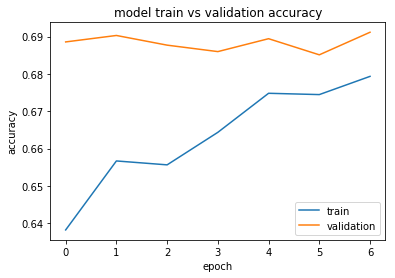

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.54      0.12      0.20       364
          1       0.70      0.95      0.81       792

avg / total       0.65      0.69      0.62      1156

Fit LSTM Course DDD - 2 Target Classes - Decile1
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 24s 8ms/step - loss: 0.5983 - acc: 0.6727 - val_loss: 0.5459 - val_acc: 0.7569
Epoch 2/7
2866/2866 [==============================] - 14s 5ms/step - loss: 0.5689 - acc: 0.7038 - val_loss: 0.5457 - val_acc: 0.7396
Epoch 3/7
2866/2866 [==============================] - 14s 5ms/step - loss: 0.5602 - acc: 0.7090 - val_loss: 0.5420 - val_acc: 0.7362
Epoch 4/7
2866/2866 [==============================] - 14s 5ms/step - loss: 0.5546 - acc: 0.7216 - val_l

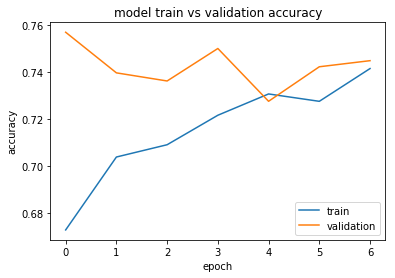

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.79      0.26      0.39       364
          1       0.74      0.97      0.84       792

avg / total       0.76      0.74      0.70      1156

Fit LSTM Course DDD - 2 Target Classes - Decile2
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 24s 9ms/step - loss: 0.5531 - acc: 0.7244 - val_loss: 0.5848 - val_acc: 0.7405
Epoch 2/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.5022 - acc: 0.7617 - val_loss: 0.5349 - val_acc: 0.7604
Epoch 3/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4896 - acc: 0.7694 - val_loss: 0.5965 - val_acc: 0.7336
Epoch 4/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4824 - acc: 0.7659 - val_l

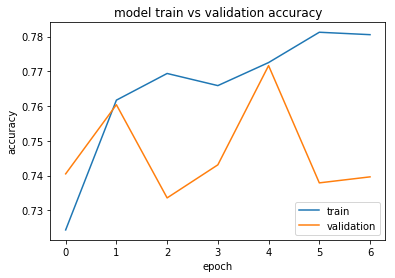

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.21      0.34       364
          1       0.73      0.98      0.84       792

avg / total       0.77      0.74      0.68      1156

Fit LSTM Course DDD - 2 Target Classes - Decile3
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 25s 9ms/step - loss: 0.5336 - acc: 0.7428 - val_loss: 0.6092 - val_acc: 0.7413
Epoch 2/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4763 - acc: 0.7805 - val_loss: 0.5131 - val_acc: 0.7448
Epoch 3/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4669 - acc: 0.7819 - val_loss: 0.4725 - val_acc: 0.7699
Epoch 4/7
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4580 - acc: 0.7812 - val_l

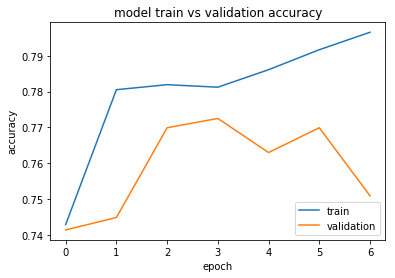

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.23      0.36       364
          1       0.74      0.99      0.85       792

avg / total       0.80      0.75      0.69      1156

Fit LSTM Course DDD - 2 Target Classes - Decile4
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 26s 9ms/step - loss: 0.5206 - acc: 0.7502 - val_loss: 0.5942 - val_acc: 0.6886
Epoch 2/7
2866/2866 [==============================] - 16s 6ms/step - loss: 0.4439 - acc: 0.8015 - val_loss: 0.4565 - val_acc: 0.7872
Epoch 3/7
2866/2866 [==============================] - 16s 6ms/step - loss: 0.4175 - acc: 0.8168 - val_loss: 0.4657 - val_acc: 0.7950
Epoch 4/7
2866/2866 [==============================] - 16s 6ms/step - loss: 0.4024 - acc: 0.8182 - val_l

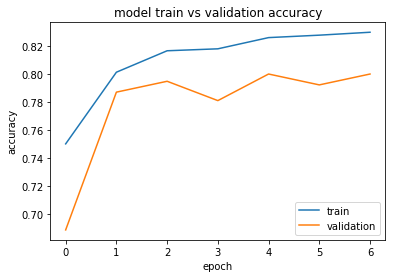

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.74      0.57      0.64       364
          1       0.82      0.91      0.86       792

avg / total       0.79      0.80      0.79      1156

Fit LSTM Course DDD - 2 Target Classes - Decile5
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 27s 9ms/step - loss: 0.4800 - acc: 0.7763 - val_loss: 0.6078 - val_acc: 0.6635
Epoch 2/7
2866/2866 [==============================] - 17s 6ms/step - loss: 0.4086 - acc: 0.8210 - val_loss: 0.4254 - val_acc: 0.8071
Epoch 3/7
2866/2866 [==============================] - 17s 6ms/step - loss: 0.3833 - acc: 0.8294 - val_loss: 0.4112 - val_acc: 0.8131
Epoch 4/7
2866/2866 [==============================] - 17s 6ms/step - loss: 0.3758 - acc: 0.8325 - val_l

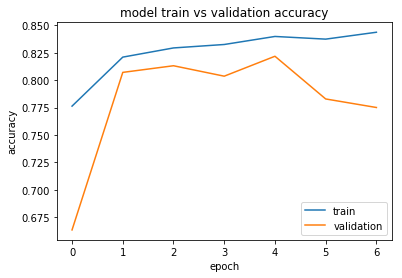

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.29      0.45       364
          1       0.75      1.00      0.86       792

avg / total       0.82      0.78      0.73      1156

Fit LSTM Course DDD - 2 Target Classes - Decile6
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 27s 10ms/step - loss: 0.4867 - acc: 0.7673 - val_loss: 0.4268 - val_acc: 0.8010
Epoch 2/7
2866/2866 [==============================] - 17s 6ms/step - loss: 0.3970 - acc: 0.8301 - val_loss: 0.4243 - val_acc: 0.8036
Epoch 3/7
2866/2866 [==============================] - 17s 6ms/step - loss: 0.3711 - acc: 0.8336 - val_loss: 0.4700 - val_acc: 0.7976
Epoch 4/7
2866/2866 [==============================] - 17s 6ms/step - loss: 0.3584 - acc: 0.8416 - val_

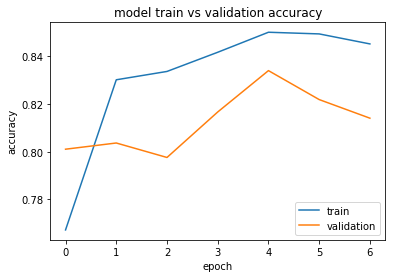

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.43      0.60       364
          1       0.79      0.99      0.88       792

avg / total       0.84      0.81      0.79      1156

Fit LSTM Course DDD - 2 Target Classes - Decile7
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 28s 10ms/step - loss: 0.4477 - acc: 0.7962 - val_loss: 0.4911 - val_acc: 0.7716
Epoch 2/7
2866/2866 [==============================] - 18s 6ms/step - loss: 0.3579 - acc: 0.8395 - val_loss: 0.3717 - val_acc: 0.8400
Epoch 3/7
2866/2866 [==============================] - 18s 6ms/step - loss: 0.3426 - acc: 0.8535 - val_loss: 0.3928 - val_acc: 0.8443
Epoch 4/7
2866/2866 [==============================] - 18s 6ms/step - loss: 0.3350 - acc: 0.8524 - val_

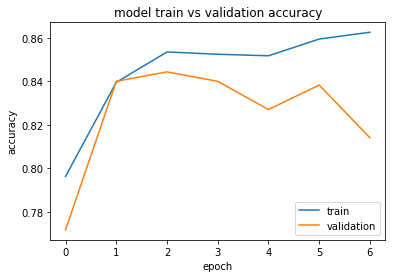

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.46      0.61       364
          1       0.80      0.97      0.88       792

avg / total       0.83      0.81      0.79      1156

Fit LSTM Course DDD - 2 Target Classes - Decile8
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 29s 10ms/step - loss: 0.4351 - acc: 0.8008 - val_loss: 0.3833 - val_acc: 0.8417
Epoch 2/7
2866/2866 [==============================] - 19s 7ms/step - loss: 0.3446 - acc: 0.8552 - val_loss: 0.3465 - val_acc: 0.8400
Epoch 3/7
2866/2866 [==============================] - 19s 7ms/step - loss: 0.3342 - acc: 0.8580 - val_loss: 0.4813 - val_acc: 0.8123
Epoch 4/7
2866/2866 [==============================] - 19s 7ms/step - loss: 0.3271 - acc: 0.8576 - val_

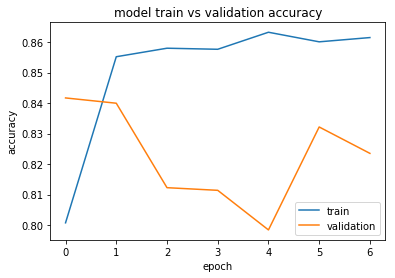

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.48      0.63       364
          1       0.80      0.98      0.88       792

avg / total       0.84      0.82      0.80      1156

Fit LSTM Course DDD - 2 Target Classes - Decile9
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 30s 10ms/step - loss: 0.4372 - acc: 0.7948 - val_loss: 0.3851 - val_acc: 0.8080
Epoch 2/7
2866/2866 [==============================] - 20s 7ms/step - loss: 0.3325 - acc: 0.8528 - val_loss: 0.4226 - val_acc: 0.7984
Epoch 3/7
2866/2866 [==============================] - 19s 7ms/step - loss: 0.3131 - acc: 0.8657 - val_loss: 0.3591 - val_acc: 0.8201
Epoch 4/7
2866/2866 [==============================] - 19s 7ms/step - loss: 0.3063 - acc: 0.8618 - val_

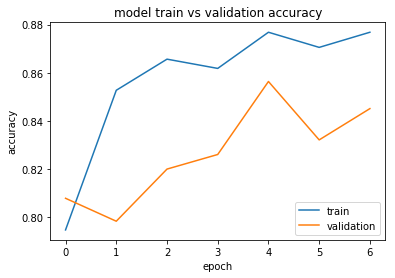

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.55      0.69       364
          1       0.83      0.98      0.90       792

avg / total       0.86      0.85      0.83      1156

Fit LSTM Course DDD - 2 Target Classes - Decile10
Train on 2866 samples, validate on 1156 samples
Epoch 1/7
2866/2866 [==============================] - 31s 11ms/step - loss: 0.3609 - acc: 0.8440 - val_loss: 0.2813 - val_acc: 0.8746
Epoch 2/7
2866/2866 [==============================] - 20s 7ms/step - loss: 0.2414 - acc: 0.8925 - val_loss: 0.2878 - val_acc: 0.8633
Epoch 3/7
2866/2866 [==============================] - 20s 7ms/step - loss: 0.2232 - acc: 0.9020 - val_loss: 0.2408 - val_acc: 0.8625
Epoch 4/7
2866/2866 [==============================] - 20s 7ms/step - loss: 0.2179 - acc: 0.9044 - val

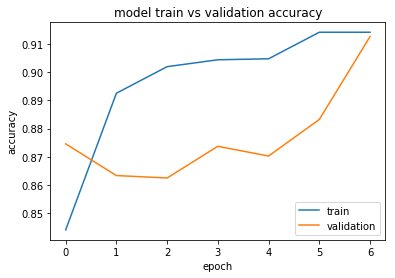

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.82      0.86       364
          1       0.92      0.95      0.94       792

avg / total       0.91      0.91      0.91      1156



In [40]:
for i in Deciles:
    # Build model for each timestep
    
    LSTM_input = Input(shape=(i+1,3), name='LSTM_input')
    LSTM_out = LSTM(32)(LSTM_input)

    auxiliary_input = Input(shape=(29,), name='aux_input')
    auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
    auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

    x = keras.layers.concatenate([LSTM_out, auxiliary_output])


    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    main_output = Dense(1, activation='sigmoid', name='main_output')(x)

    DDD_model_names[i] = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
    DDD_model_names[i].compile(optimizer="adam", loss='binary_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
    print('Fit LSTM Course DDD - 2 Target Classes - Decile' + str(i))
    #ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    history = DDD_model_names[i].fit([DDD_Train_set[i],DDD_AUX_Train], DDD_Train_Targets_1D, epochs=7, batch_size=1, verbose=1,
                                    validation_data = ([DDD_Test_set[i], DDD_AUX_Test], DDD_Test_Targets_1D))
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    y_pred_DDD = DDD_model_names[i].predict([DDD_Test_set[i], DDD_AUX_Test])
    y_classes_DDD = np.round(y_pred_DDD)
    
    print('-------------------------------------------')
    print('Test LSTM Course DDD - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
    

## LSTM Course FFF

In [33]:
Deciles = np.arange(11)
FFF_model_names = ["modelFFF0", "modelFFF1", "modelFFF2", "modelFFF3", "modelFFF4", "modelFFF5",
                   "modelFFF6", "modelFFF7", "modelFFF8", "modelFFF9", "modelFFF10"]
FFF_names = ["FFF0", "FFF1", "FFF2", "FFF3", "FFF4", "FFF5", "FFF6", "FFF7", "FFF8", "FFF9", "FFF10"]
FFF_Train_set = [FFF_Train_3D_Decile0,FFF_Train_3D_Decile1,FFF_Train_3D_Decile2,FFF_Train_3D_Decile3,FFF_Train_3D_Decile4,
                 FFF_Train_3D_Decile5,FFF_Train_3D_Decile6,FFF_Train_3D_Decile7,FFF_Train_3D_Decile8,FFF_Train_3D_Decile9,
                 FFF_Train_3D]
FFF_Test_set = [FFF_Test_3D_Decile0,FFF_Test_3D_Decile1,FFF_Test_3D_Decile2,FFF_Test_3D_Decile3,FFF_Test_3D_Decile4,
                 FFF_Test_3D_Decile5,FFF_Test_3D_Decile6,FFF_Test_3D_Decile7,FFF_Test_3D_Decile8,FFF_Test_3D_Decile9,
                 FFF_Test_3D]

Fit LSTM Course FFF - 2 Target Classes - Decile0


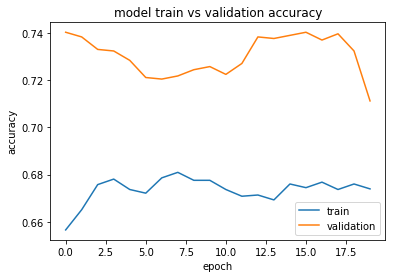

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.35      0.13      0.19       393
          1       0.75      0.91      0.82      1117

avg / total       0.65      0.71      0.66      1510

Fit LSTM Course FFF - 2 Target Classes - Decile1


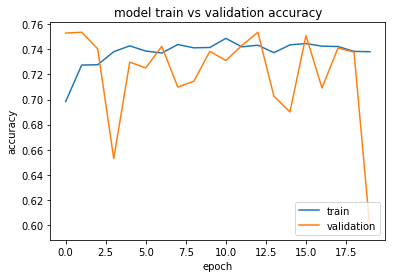

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.36      0.74      0.49       393
          1       0.85      0.55      0.67      1117

avg / total       0.73      0.60      0.62      1510

Fit LSTM Course FFF - 2 Target Classes - Decile2


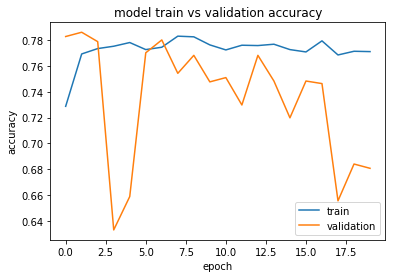

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.41      0.55      0.47       393
          1       0.82      0.73      0.77      1117

avg / total       0.72      0.68      0.69      1510

Fit LSTM Course FFF - 2 Target Classes - Decile3


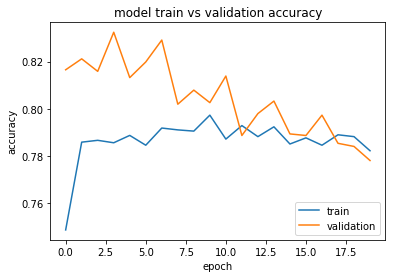

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.71      0.25      0.37       393
          1       0.78      0.97      0.87      1117

avg / total       0.77      0.78      0.74      1510

Fit LSTM Course FFF - 2 Target Classes - Decile4


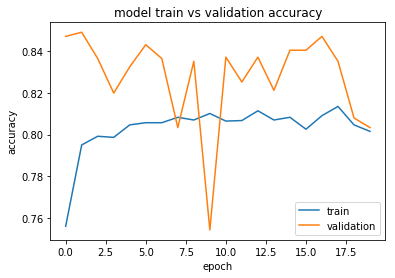

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.26      0.41       393
          1       0.79      0.99      0.88      1117

avg / total       0.83      0.80      0.76      1510

Fit LSTM Course FFF - 2 Target Classes - Decile5


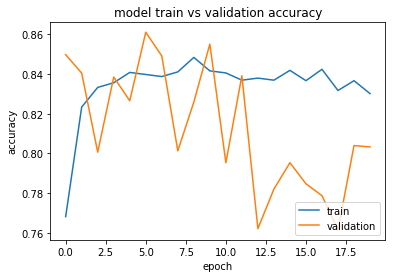

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.26      0.41       393
          1       0.79      0.99      0.88      1117

avg / total       0.83      0.80      0.76      1510

Fit LSTM Course FFF - 2 Target Classes - Decile6


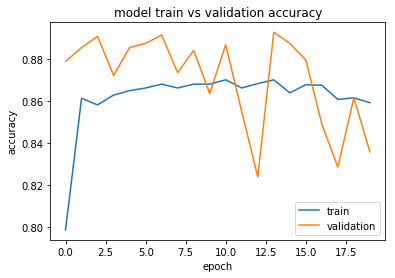

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.38      0.54       393
          1       0.82      1.00      0.90      1117

avg / total       0.86      0.84      0.81      1510

Fit LSTM Course FFF - 2 Target Classes - Decile7


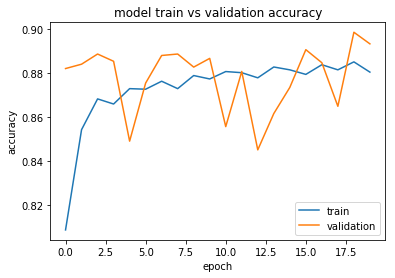

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.87      0.69      0.77       393
          1       0.90      0.97      0.93      1117

avg / total       0.89      0.89      0.89      1510

Fit LSTM Course FFF - 2 Target Classes - Decile8


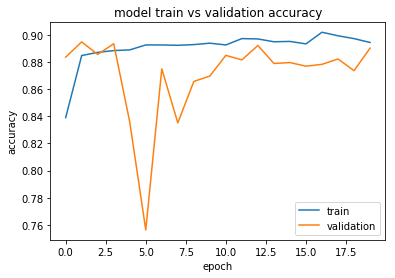

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.69      0.76       393
          1       0.90      0.96      0.93      1117

avg / total       0.89      0.89      0.89      1510

Fit LSTM Course FFF - 2 Target Classes - Decile9


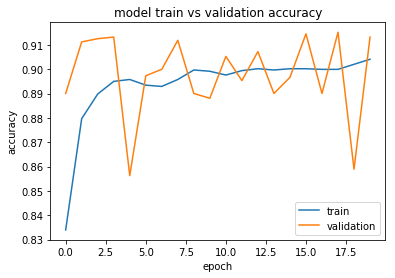

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.74      0.82       393
          1       0.91      0.97      0.94      1117

avg / total       0.91      0.91      0.91      1510

Fit LSTM Course FFF - 2 Target Classes - Decile10


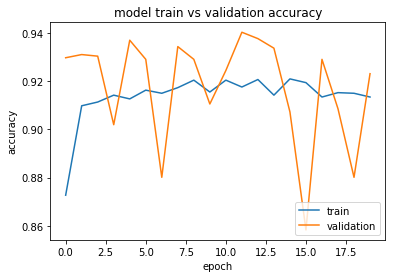

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.86      0.85       393
          1       0.95      0.95      0.95      1117

avg / total       0.92      0.92      0.92      1510



In [65]:
for i in Deciles:
    
    # Build model for each timestep
    
    LSTM_input = Input(shape=(i+1,3), name='LSTM_input')
    LSTM_out = LSTM(32)(LSTM_input)

    auxiliary_input = Input(shape=(29,), name='aux_input')
    auxiliary_layer = Dense(32, activation='relu')(auxiliary_input)
    auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

    x = keras.layers.concatenate([LSTM_out, auxiliary_output])  # Merge LSTM and Auxiliary input

    x = Dense(32, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    main_output = Dense(1, activation='sigmoid', name='main_output')(x)

    FFF_model_names[i] = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
    FFF_model_names[i].compile("adadelta", loss='binary_crossentropy',metrics = ['accuracy'])
    
    
    # Fit model for each timestep
    print('Fit LSTM Course FFF - 2 Target Classes - Decile' + str(i))
#   ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    history = FFF_model_names[i].fit([FFF_Train_set[i],FFF_AUX_Train], FFF_Train_Targets_1D, epochs=20, batch_size=1, verbose=0,
                           validation_data = ([FFF_Test_set[i], FFF_AUX_Test], FFF_Test_Targets_1D))
   
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    y_pred_FFF = FFF_model_names[i].predict([FFF_Test_set[i], FFF_AUX_Test])
    y_classes_FFF = np.round(y_pred_FFF)
    
    print('-------------------------------------------')
    print('Test LSTM Course FFF - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))

# Alternative approach: model every timestep individually

# LSTM Course BBB

### Train LSTM Course BBB

#### Train Decile 10 BBB

In [ ]:
LSTM_input = Input(shape=(11,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [64]:
model.fit([BBB_Train_3D,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4631 - acc: 0.8120
Epoch 2/10
3978/3978 [==============================] - 24s 6ms/step - loss: 0.3747 - acc: 0.8768
Epoch 3/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4020 - acc: 0.8839
Epoch 4/10
3978/3978 [==============================] - 26s 7ms/step - loss: 0.4060 - acc: 0.8866
Epoch 5/10
3978/3978 [==============================] - 27s 7ms/step - loss: 0.4015 - acc: 0.8866
Epoch 6/10
3978/3978 [==============================] - 27s 7ms/step - loss: 0.4101 - acc: 0.8912
Epoch 7/10
3978/3978 [==============================] - 27s 7ms/step - loss: 0.4103 - acc: 0.8896
Epoch 8/10
3978/3978 [==============================] - 27s 7ms/step - loss: 0.4370 - acc: 0.8891
Epoch 9/10
3978/3978 [==============================] - 27s 7ms/step - loss: 0.4074 - acc: 0.8866
Epoch 10/10
3978/3978 [==============================] - 27s 7ms/step - loss: 0.4419 - acc: 0.8927


#### Train Decile 9 BBB

In [69]:
LSTM_input = Input(shape=(10,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB9 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB9.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [71]:
modelBBB9.fit([BBB_Train_3D_Decile9,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 24s 6ms/step - loss: 0.4190 - acc: 0.8328
Epoch 2/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.3774 - acc: 0.8786
Epoch 3/10
3978/3978 [==============================] - 24s 6ms/step - loss: 0.3930 - acc: 0.8808
Epoch 4/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4190 - acc: 0.8819
Epoch 5/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4100 - acc: 0.8866
Epoch 6/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4487 - acc: 0.8891
Epoch 7/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4619 - acc: 0.8844
Epoch 8/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.5156 - acc: 0.8831
Epoch 9/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4588 - acc: 0.8813
Epoch 10/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4482 - acc: 0.8813


#### Train Decile 8 BBB

In [74]:
LSTM_input = Input(shape=(9,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB8 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB8.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [75]:
modelBBB8.fit([BBB_Train_3D_Decile8,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 22s 6ms/step - loss: 0.4653 - acc: 0.8117
Epoch 2/10
3978/3978 [==============================] - 22s 5ms/step - loss: 0.4105 - acc: 0.8685
Epoch 3/10
3978/3978 [==============================] - 22s 5ms/step - loss: 0.3986 - acc: 0.8665
Epoch 4/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.4223 - acc: 0.8713
Epoch 5/10
3978/3978 [==============================] - 25s 6ms/step - loss: 0.4184 - acc: 0.8743
Epoch 6/10
3978/3978 [==============================] - 26s 6ms/step - loss: 0.4606 - acc: 0.8733
Epoch 7/10
3978/3978 [==============================] - 24s 6ms/step - loss: 0.4417 - acc: 0.8728
Epoch 8/10
3978/3978 [==============================] - 24s 6ms/step - loss: 0.4390 - acc: 0.8761
Epoch 9/10
3978/3978 [==============================] - 24s 6ms/step - loss: 0.4660 - acc: 0.8683
Epoch 10/10
3978/3978 [==============================] - 24s 6ms/step - loss: 0.5118 - acc: 0.8801


#### Train Decile 7 BBB

In [79]:
LSTM_input = Input(shape=(8,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB7 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB7.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [80]:
modelBBB7.fit([BBB_Train_3D_Decile7,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 22s 5ms/step - loss: 0.4529 - acc: 0.8190
Epoch 2/10
3978/3978 [==============================] - 21s 5ms/step - loss: 0.4288 - acc: 0.8670
Epoch 3/10
3978/3978 [==============================] - 21s 5ms/step - loss: 0.4281 - acc: 0.8645
Epoch 4/10
3978/3978 [==============================] - 22s 5ms/step - loss: 0.4453 - acc: 0.8675
Epoch 5/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.4619 - acc: 0.8655
Epoch 6/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.4721 - acc: 0.8698
Epoch 7/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.5136 - acc: 0.8673
Epoch 8/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.5042 - acc: 0.8635
Epoch 9/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.4857 - acc: 0.8695
Epoch 10/10
3978/3978 [==============================] - 23s 6ms/step - loss: 0.4908 - acc: 0.8610


#### Train Decile 6 BBB

In [83]:
LSTM_input = Input(shape=(7,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB6 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB6.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [84]:
modelBBB6.fit([BBB_Train_3D_Decile6,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 22s 5ms/step - loss: 0.4920 - acc: 0.7868
Epoch 2/10
3978/3978 [==============================] - 20s 5ms/step - loss: 0.4561 - acc: 0.8353
Epoch 3/10
3978/3978 [==============================] - 20s 5ms/step - loss: 0.4668 - acc: 0.8404
Epoch 4/10
3978/3978 [==============================] - 21s 5ms/step - loss: 0.5003 - acc: 0.8426
Epoch 5/10
3978/3978 [==============================] - 22s 5ms/step - loss: 0.5212 - acc: 0.8431
Epoch 6/10
3978/3978 [==============================] - 22s 5ms/step - loss: 0.5131 - acc: 0.8454
Epoch 7/10
3978/3978 [==============================] - 22s 6ms/step - loss: 0.4993 - acc: 0.8474
Epoch 8/10
3978/3978 [==============================] - 22s 6ms/step - loss: 0.5079 - acc: 0.8439
Epoch 9/10
3978/3978 [==============================] - 22s 6ms/step - loss: 0.5751 - acc: 0.8454
Epoch 10/10
3978/3978 [==============================] - 22s 6ms/step - loss: 0.5195 - acc: 0.8409


#### Train Decile 5 BBB

In [85]:
LSTM_input = Input(shape=(6,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB5 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB5.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [86]:
modelBBB5.fit([BBB_Train_3D_Decile5,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 20s 5ms/step - loss: 0.5240 - acc: 0.7680
Epoch 2/10
3978/3978 [==============================] - 19s 5ms/step - loss: 0.4953 - acc: 0.8072
Epoch 3/10
3978/3978 [==============================] - 20s 5ms/step - loss: 0.5271 - acc: 0.8175
Epoch 4/10
3978/3978 [==============================] - 20s 5ms/step - loss: 0.6202 - acc: 0.8167
Epoch 5/10
3978/3978 [==============================] - 19s 5ms/step - loss: 0.5695 - acc: 0.8157
Epoch 6/10
3978/3978 [==============================] - 19s 5ms/step - loss: 0.5700 - acc: 0.8205
Epoch 7/10
3978/3978 [==============================] - 19s 5ms/step - loss: 0.5866 - acc: 0.8223
Epoch 8/10
3978/3978 [==============================] - 19s 5ms/step - loss: 0.6752 - acc: 0.8162
Epoch 9/10
3978/3978 [==============================] - 20s 5ms/step - loss: 0.6384 - acc: 0.8208
Epoch 10/10
3978/3978 [==============================] - 20s 5ms/step - loss: 0.6237 - acc: 0.8160


#### Train Decile 4 BBB

In [91]:
LSTM_input = Input(shape=(5,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB4 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB4.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [92]:
modelBBB4.fit([BBB_Train_3D_Decile4,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 18s 5ms/step - loss: 0.5366 - acc: 0.7652
Epoch 2/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5027 - acc: 0.8089
Epoch 3/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5302 - acc: 0.8059
Epoch 4/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5621 - acc: 0.8074
Epoch 5/10
3978/3978 [==============================] - 18s 5ms/step - loss: 0.5828 - acc: 0.8012
Epoch 6/10
3978/3978 [==============================] - 18s 5ms/step - loss: 0.6310 - acc: 0.8067
Epoch 7/10
3978/3978 [==============================] - 18s 5ms/step - loss: 0.5988 - acc: 0.8054
Epoch 8/10
3978/3978 [==============================] - 18s 5ms/step - loss: 0.6463 - acc: 0.8082
Epoch 9/10
3978/3978 [==============================] - 18s 5ms/step - loss: 0.6025 - acc: 0.8074
Epoch 10/10
3978/3978 [==============================] - 18s 5ms/step - loss: 0.6237 - acc: 0.8112


#### Train Decile 3 BBB

In [93]:
LSTM_input = Input(shape=(4,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB3 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB3.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [94]:
modelBBB3.fit([BBB_Train_3D_Decile3,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5708 - acc: 0.7255
Epoch 2/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.5349 - acc: 0.7720
Epoch 3/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5492 - acc: 0.7788
Epoch 4/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.5407 - acc: 0.7833
Epoch 5/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.5448 - acc: 0.7841
Epoch 6/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5415 - acc: 0.7821
Epoch 7/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5682 - acc: 0.7803
Epoch 8/10
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5579 - acc: 0.7838
Epoch 9/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.6309 - acc: 0.7833
Epoch 10/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.5958 - acc: 0.7836


#### Train Decile 2 BBB

In [100]:
LSTM_input = Input(shape=(3,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB2 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB2.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [101]:
modelBBB2.fit([BBB_Train_3D_Decile2,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.5858 - acc: 0.7252
Epoch 2/10
3978/3978 [==============================] - 14s 4ms/step - loss: 0.5826 - acc: 0.7647
Epoch 3/10
3978/3978 [==============================] - 14s 4ms/step - loss: 0.5809 - acc: 0.7720
Epoch 4/10
3978/3978 [==============================] - 14s 4ms/step - loss: 0.6274 - acc: 0.7765
Epoch 5/10
3978/3978 [==============================] - 14s 4ms/step - loss: 0.6154 - acc: 0.7705
Epoch 6/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.6482 - acc: 0.7738
Epoch 7/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.6489 - acc: 0.7695
Epoch 8/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.6850 - acc: 0.7660
Epoch 9/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.6903 - acc: 0.7715
Epoch 10/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.7208 - acc: 0.7755


#### Train Decile 1 BBB

In [102]:
LSTM_input = Input(shape=(2,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB1 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB1.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [103]:
modelBBB1.fit([BBB_Train_3D_Decile1,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.6271 - acc: 0.7071
Epoch 2/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6116 - acc: 0.7290
Epoch 3/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6232 - acc: 0.7310
Epoch 4/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6179 - acc: 0.7313
Epoch 5/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6356 - acc: 0.7338
Epoch 6/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6276 - acc: 0.7330
Epoch 7/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6314 - acc: 0.7308
Epoch 8/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6374 - acc: 0.7323
Epoch 9/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6555 - acc: 0.7315
Epoch 10/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6640 - acc: 0.7393


#### Train Pre-course BBB

In [104]:
LSTM_input = Input(shape=(1,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

modelBBB0 = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
modelBBB0.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['accuracy'])

In [105]:
modelBBB0.fit([BBB_Train_3D_Decile0,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6468 - acc: 0.6561
Epoch 2/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6332 - acc: 0.6652
Epoch 3/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6351 - acc: 0.6591
Epoch 4/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6332 - acc: 0.6634
Epoch 5/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6356 - acc: 0.6624
Epoch 6/10
3978/3978 [==============================] - 11s 3ms/step - loss: 0.6387 - acc: 0.6629
Epoch 7/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6355 - acc: 0.6621
Epoch 8/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6374 - acc: 0.6616
Epoch 9/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6375 - acc: 0.6626
Epoch 10/10
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6330 - acc: 0.6626


### Test LSTM Course BBB

#### Test Decile 10 BBB

In [65]:
y_pred_BBB = model.predict([BBB_Test_3D, BBB_AUX_Test])
y_classes_BBB = np.round(y_pred_BBB)

In [66]:
print('Course BBB - 2 Target Classes - Decile 10 - Full Model')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 10 - Full Model
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.49      0.92      0.64       391
          1       0.96      0.68      0.80      1152

avg / total       0.84      0.74      0.76      1543



#### Test Decile 9 BBB

In [72]:
y_pred_BBB9 = modelBBB9.predict([BBB_Test_3D_Decile9, BBB_AUX_Test])
y_classes_BBB9 = np.round(y_pred_BBB9)

In [73]:
print('Course BBB - 2 Target Classes - Decile 9')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB9, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.67      0.82      0.74       391
          1       0.93      0.86      0.90      1152

avg / total       0.87      0.85      0.86      1543



#### Test Decile 8 BBB

In [77]:
y_pred_BBB8 = modelBBB8.predict([BBB_Test_3D_Decile8, BBB_AUX_Test])
y_classes_BBB8 = np.round(y_pred_BBB8)

In [78]:
print('Course BBB - 2 Target Classes - Decile 8')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB8, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.51      0.87      0.64       391
          1       0.94      0.71      0.81      1152

avg / total       0.83      0.75      0.77      1543



#### Test Decile 7 BBB

In [81]:
y_pred_BBB7 = modelBBB7.predict([BBB_Test_3D_Decile7, BBB_AUX_Test])
y_classes_BBB7 = np.round(y_pred_BBB7)

In [82]:
print('Course BBB - 2 Target Classes - Decile 7')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB7, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.56      0.80      0.66       391
          1       0.92      0.79      0.85      1152

avg / total       0.83      0.79      0.80      1543



#### Test Decile 6 BBB

In [87]:
y_pred_BBB6 = modelBBB6.predict([BBB_Test_3D_Decile6, BBB_AUX_Test])
y_classes_BBB6 = np.round(y_pred_BBB6)

In [88]:
print('Course BBB - 2 Target Classes - Decile 6')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB6, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.62      0.52      0.56       391
          1       0.85      0.89      0.87      1152

avg / total       0.79      0.80      0.79      1543



#### Test Decile 5 BBB

In [89]:
y_pred_BBB5 = modelBBB5.predict([BBB_Test_3D_Decile5, BBB_AUX_Test])
y_classes_BBB5 = np.round(y_pred_BBB5)

In [90]:
print('Course BBB - 2 Target Classes - Decile 5')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB5, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.58      0.58       391
          1       0.86      0.86      0.86      1152

avg / total       0.79      0.79      0.79      1543



#### Test Decile 4 BBB

In [95]:
y_pred_BBB4 = modelBBB4.predict([BBB_Test_3D_Decile4, BBB_AUX_Test])
y_classes_BBB4 = np.round(y_pred_BBB4)

In [96]:
print('Course BBB - 2 Target Classes - Decile 4')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB4, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.35      0.82      0.50       391
          1       0.89      0.49      0.63      1152

avg / total       0.75      0.57      0.60      1543



#### Test Decile 3 BBB

In [98]:
y_pred_BBB3 = modelBBB3.predict([BBB_Test_3D_Decile3, BBB_AUX_Test])
y_classes_BBB3 = np.round(y_pred_BBB3)

In [99]:
print('Course BBB - 2 Target Classes - Decile 3')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB3, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.32      0.52      0.39       391
          1       0.79      0.62      0.69      1152

avg / total       0.67      0.59      0.62      1543



#### Test Decile 2 BBB

In [106]:
y_pred_BBB2 = modelBBB2.predict([BBB_Test_3D_Decile2, BBB_AUX_Test])
y_classes_BBB2 = np.round(y_pred_BBB2)

In [107]:
print('Course BBB - 2 Target Classes - Decile 2')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB2, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.30      0.52      0.38       391
          1       0.78      0.60      0.68      1152

avg / total       0.66      0.58      0.60      1543



#### Test Decile 1 BBB

In [108]:
y_pred_BBB1 = modelBBB1.predict([BBB_Test_3D_Decile1, BBB_AUX_Test])
y_classes_BBB1 = np.round(y_pred_BBB1)

In [109]:
print('Course BBB - 2 Target Classes - Decile 1')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB1, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.31      0.52      0.39       391
          1       0.79      0.61      0.69      1152

avg / total       0.67      0.59      0.61      1543



#### Test Pre-course BBB

In [110]:
y_pred_BBB0 = modelBBB0.predict([BBB_Test_3D_Decile0, BBB_AUX_Test])
y_classes_BBB0 = np.round(y_pred_BBB0)

In [111]:
print('Course BBB - 2 Target Classes - Decile 0')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB0, y_true=BBB_Test_Targets_1D))

Course BBB - 2 Target Classes - Decile 0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.34      0.38      0.36       391
          1       0.78      0.75      0.76      1152

avg / total       0.67      0.65      0.66      1543



# LSTM Course DDD

### Train LSTM Course DDD

#### Train Decile 10 DDD

In [100]:
model.fit([DDD_Train_3D,DDD_AUX_Train], DDD_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
2866/2866 [==============================] - 19s 7ms/step - loss: 0.4515 - acc: 0.8109
Epoch 2/10
2866/2866 [==============================] - 19s 7ms/step - loss: 0.3181 - acc: 0.8901
Epoch 3/10
2866/2866 [==============================] - 17s 6ms/step - loss: 0.3061 - acc: 0.8988
Epoch 4/10
2866/2866 [==============================] - 16s 6ms/step - loss: 0.3021 - acc: 0.9023
Epoch 5/10
2866/2866 [==============================] - 16s 6ms/step - loss: 0.2979 - acc: 0.8974
Epoch 6/10
2866/2866 [==============================] - 15s 5ms/step - loss: 0.3069 - acc: 0.9009
Epoch 7/10
2866/2866 [==============================] - 15s 5ms/step - loss: 0.3619 - acc: 0.9040
Epoch 8/10
2866/2866 [==============================] - 15s 5ms/step - loss: 0.3133 - acc: 0.9096
Epoch 9/10
2866/2866 [==============================] - 15s 5ms/step - loss: 0.3046 - acc: 0.9082
Epoch 10/10
2866/2866 [==============================] - 16s 5ms/step - loss: 0.3283 - acc: 0.9093


#### Train Decile 9 DDD

#### Train Decile 8 DDD

#### Train Decile 7 DDD

#### Train Decile 6 DDD

#### Train Decile 5 DDD

#### Train Decile 4 DDD

#### Train Decile 3 DDD

#### Train Decile 2 DDD

#### Train Decile 1 DDD

#### Train Pre-course DDD

### Test LSTM Course DDD

#### Test Decile 10 DDD

In [133]:
y_pred_DDD = model.predict([DDD_Test_3D, DDD_AUX_Test])
y_classes_DDD = np.round(y_pred_DDD)
y_classes_DDD

array([[ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
      

In [134]:
print('Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))

Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.59      0.73       364
          1       0.84      0.99      0.91       792

avg / total       0.88      0.86      0.85      1156



#### Test Decile 9 DDD

#### Test Decile 8 DDD

#### Test Decile 7 DDD

#### Test Decile 6 DDD

#### Test Decile 5 DDD

#### Test Decile 4 DDD

#### Test Decile 3 DDD

#### Test Decile 2 DDD

#### Test Decile 1 DDD

#### Test Pre-course DDD

# LSTM Course FFF

### Train LSTM Course FFF

#### Train Decile 10 FFF

In [113]:
model.fit([FFF_Train_3D,FFF_AUX_Train], FFF_Train_Targets_1D, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3849/3849 [==============================] - 2s 569us/step - loss: 0.5421 - acc: 0.7454
Epoch 2/20
3849/3849 [==============================] - 1s 210us/step - loss: 0.2985 - acc: 0.8958
Epoch 3/20
3849/3849 [==============================] - 1s 214us/step - loss: 0.2371 - acc: 0.9111
Epoch 4/20
3849/3849 [==============================] - 1s 210us/step - loss: 0.2287 - acc: 0.9101
Epoch 5/20
3849/3849 [==============================] - 1s 212us/step - loss: 0.2136 - acc: 0.9163
Epoch 6/20
3849/3849 [==============================] - 1s 224us/step - loss: 0.2146 - acc: 0.9166
Epoch 7/20
3849/3849 [==============================] - 1s 215us/step - loss: 0.2134 - acc: 0.9187
Epoch 8/20
3849/3849 [==============================] - 1s 211us/step - loss: 0.2037 - acc: 0.9182
Epoch 9/20
3849/3849 [==============================] - 1s 212us/step - loss: 0.2091 - acc: 0.9202
Epoch 10/20
3849/3849 [==============================] - 1s 211us/step - loss: 0.1885 - acc: 0.9254
Epoch 11/

#### Train Decile 9 FFF

#### Train Decile 8 FFF

#### Train Decile 7 FFF

#### Train Decile 6 FFF

#### Train Decile 5 FFF

#### Train Decile 4 FFF

#### Train Decile 3 FFF

#### Train Decile 2 FFF

#### Train Decile 1 FFF

#### Train Pre-course FFF

### Test LSTM Course FFF

#### Test Decile 10 FFF

In [114]:
y_pred_FFF = model.predict([FFF_Test_3D, FFF_AUX_Test])
y_classes_FFF = np.round(y_pred_FFF)

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [115]:
print('Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))

Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.81      0.87       393
          1       0.94      0.98      0.96      1117

avg / total       0.93      0.93      0.93      1510



#### Test Decile 9 FFF

#### Test Decile 8 FFF

#### Test Decile 7 FFF

#### Test Decile 6 FFF

#### Test Decile 5 FFF

#### Test Decile 4 FFF

#### Test Decile 3 FFF

#### Test Decile 2 FFF

#### Test Decile 1 FFF

#### Test Pre-course FFF